In [5]:
import options
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime

from varname import nameof
import math

In [3]:
# !pip install gspread
# !pip install --upgrade oauth2client
# !pip install PyOpenSSL

import gspread
from oauth2client.service_account import ServiceAccountCredentials

In [4]:
plt.style.use('seaborn')

<H1> Stock Option Classes</H1>

<h2>moved to a separate file (options.py) for modular purpose</h2>

<h1>Applications</H1>

In [6]:
import importlib
importlib.reload(options)

<module 'options' from '/Users/xzhou/github/stock/stock_options_trading/options.py'>

In [41]:
bc_20_dic = {'ticker': 'abc',
     'expiration': '2025-01-02',
     'action':'buy',
     'strike': 20,
     'premium':48,
     'curr_price':58,
     'imp_vol':0.33
    }

In [42]:
test = options.Call(**bc_20_dic)

In [ ]:
options.Call()

Strategy: NIO220501_BC50_SC80 
Payoff Range:[ -5.0 , 25.0 ];Breakeven Price: 55 ;Cost: 5.0 ;Return Range:[ -100.0% , 500.0% ] ; Avg. Return: 107.5% ; Avg. Annual Return: 148.3% 

Strategy: Stock Only 
Price Range:[ 0 , 143 ];Payoff Range:[ -58 , 42 ];Breakeven Price: 58 Cost: 58 ;Return Range:[ -100.0% , 72.4% ]


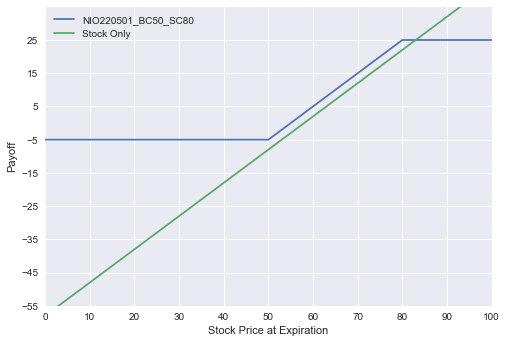

In [18]:
# Bull Spread Strategy: buy call 50 and sell call 80

bc50 = options.Call('NIO', '2022-05-01', 'buy', 50, 20, 58, 0.33)
sc80 = options.Call('NIO', '2022-05-01', 'sell', 80, 15, 58, 0.33)

bc50_sc80 = options.OptionsStrategy([bc50, sc80])

bc50_sc80.create_graph()
bc50_sc80.create_graph_stock_only()

Strategy: NIO220501_BC50_BP50 
Payoff Range:[ -35.0 , 15.0 ];Breakeven Price: 15 ;Cost: 35.0 ;Return Range:[ -100.0% , 42.9% ] ; Avg. Return: -57.0% ; Avg. Annual Return: -65.1% 

Strategy: Stock Only 
Price Range:[ 0 , 142 ];Payoff Range:[ -58 , 42 ];Breakeven Price: 58 Cost: 58 ;Return Range:[ -100.0% , 72.4% ]


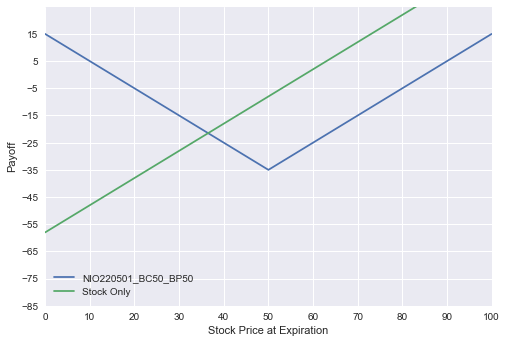

In [19]:
# Straddle Strategy: buy call 50 and buy put 50

bc50 = options.Call('NIO', '2022-05-01', 'buy', 50, 20, 58, 0.33)
bp50 = options.Put('NIO', '2022-05-01', 'buy', 50, 15, 58, 0.33)

bc50_sc80 = options.OptionsStrategy([bc50, bp50])

bc50_sc80.create_graph()
bc50_sc80.create_graph_stock_only()

Strategy: NIO220501_BC50_SC60_BC70 
Payoff Range:[ -4 , 6 ];Breakeven Price: 54 ;Cost: 4 ;Return Range:[ -100.0% , 150.0% ] ; Avg. Return: -44.3% ; Avg. Annual Return: -51.8% 

Strategy: Stock Only 
Price Range:[ 0 , 139 ];Payoff Range:[ -58 , 42 ];Breakeven Price: 58 Cost: 58 ;Return Range:[ -100.0% , 72.4% ]


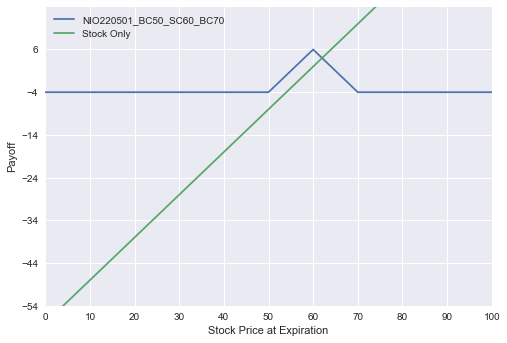

In [20]:
# Butterfly Spread Strategy: buy 1 call 50, sell 2 call 60, and buy a call 70

bc50 = options.Call('NIO', '2022-05-01', 'buy', 50, 12, 58, 0.33)
sc60 = options.Call('NIO', '2022-05-01', 'sell', 60, 5, 58, 0.33)
bc70 = options.Call('NIO', '2022-05-01', 'buy', 70, 2, 58, 0.33)

bc50_sc60_bc70 = options.OptionsStrategy([bc50, sc60, bc70], coefficients = [1, 2, 1])

bc50_sc60_bc70.create_graph()
bc50_sc60_bc70.create_graph_stock_only()

Strategy: NIO230120_BC3_BP5 
Payoff Range:[ -57.0 , 138.0 ];Breakeven Price: 62 ;Cost: 59.0 ;Return Range:[ -96.6% , 233.9% ] ; Avg. Return: -6.7% ; Avg. Annual Return: -4.4% 

Strategy: Stock Only 
Price Range:[ 0 , 165 ];Payoff Range:[ -58 , 142 ];Breakeven Price: 58 Cost: 58 ;Return Range:[ -100.0% , 244.8% ]


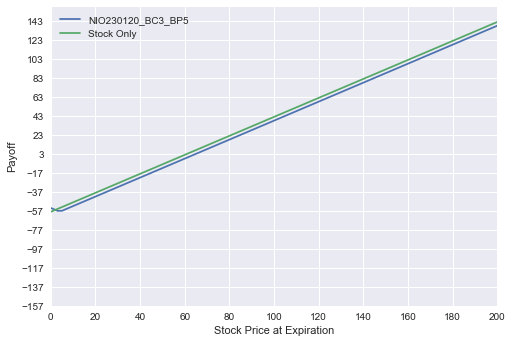

In [21]:
# Stragegy: buy call @3 and buy put @5

nio_bc3 = options.Call('NIO', '2023-01-20', 'buy', 3, 58.38, 58, 0.33, max_price=200)
nio_bp5 = options.Put('NIO', '2023-01-20', 'buy', 5, 0.59, 58, 0.33, max_price=200)

nio_bc3_bp5 = options.OptionsStrategy([nio_bc3, nio_bp5])

nio_bc3_bp5.create_graph()
nio_bc3_bp5.create_graph_stock_only()

/Users/xzhou/github/stock/stock_options_trading/options.py:329: RuntimeWarning: invalid value encountered in double_scalars
  self.avg_annualized_return = round(pow(1 + self.avg_return, 365/self.days_from_now)-1, 3)


Strategy: NIO230120_BC3_BP5 
Payoff Range:[ -57.0 , 138.0 ];Breakeven Price: 62 ;Cost: 59.0 ;Return Range:[ -96.6% , 233.9% ] ; Avg. Return: -6.8% ; Avg. Annual Return: -4.5% 

Strategy: NIO230120_BC3_SP45 
Payoff Range:[ -84.9 , 157.1 ];Breakeven Price: 44 ;Cost: 40.0 ;Return Range:[ -212.2% , 392.7% ] ; Avg. Return: 27.1% ; Avg. Annual Return: 17.0% 

Strategy: NIO230120_BC3_SP60 
Payoff Range:[ -88.9 , 168.1 ];Breakeven Price: 46 ;Cost: 28.9 ;Return Range:[ -307.6% , 581.7% ] ; Avg. Return: 54.3% ; Avg. Annual Return: 32.9% 

Strategy: NIO230120_BC3_SP70 
Payoff Range:[ -91.1 , 175.9 ];Breakeven Price: 47 ;Cost: 21.1 ;Return Range:[ -431.8% , 833.6% ] ; Avg. Return: 81.7% ; Avg. Annual Return: 47.9% 

Strategy: NIO230120_BC3_SP80 
Payoff Range:[ -93.9 , 183.1 ];Breakeven Price: 48 ;Cost: 13.9 ;Return Range:[ -675.5% , 1317.3% ] ; Avg. Return: 120.5% ; Avg. Annual Return: 67.9% 

Strategy: NIO230120_BC3_SP85 
Payoff Range:[ -98.4 , 183.6 ];Breakeven Price: 51 ;Cost: 13.4 ;Return Rang

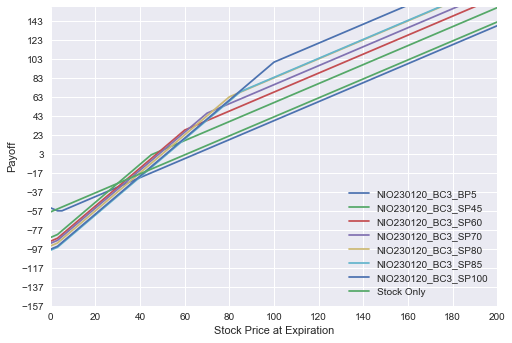

In [22]:
# NIO strategies

nio_bc3 = options.Call('NIO', '2023-01-20', 'buy', 3, 58.38, 58, 0.33, max_price=200)
nio_bp5 = options.Put('NIO', '2023-01-20', 'buy', 5, 0.59, 58, 0.33, max_price=200)
nio_sp45 = options.Put('NIO', '2023-01-20', 'sell', 45, 18.45, 58, 0.33, max_price=200)
nio_sp60 = options.Put('NIO', '2023-01-20', 'sell', 60, 29.5, 58, 0.33, max_price=200)
nio_sp70 = options.Put('NIO', '2023-01-20', 'sell', 70, 37.3, 58, 0.33, max_price=200)
nio_sp80 = options.Put('NIO', '2023-01-20', 'sell', 80, 44.5, 58, 0.33, max_price=200)
nio_sp85 = options.Put('NIO', '2023-01-20', 'sell', 85, 45, 58, 0.33, max_price=200)
nio_sp100 = options.Put('NIO', '2023-01-20', 'sell', 100, 61.05, 58, 0.33, max_price=200)


s1 = options.OptionsStrategy([nio_bc3, nio_bp5])
s2 = options.OptionsStrategy([nio_bc3, nio_sp45])
s3 = options.OptionsStrategy([nio_bc3, nio_sp60])
s4 = options.OptionsStrategy([nio_bc3, nio_sp70])
s5 = options.OptionsStrategy([nio_bc3, nio_sp80])
s6 = options.OptionsStrategy([nio_bc3, nio_sp85])
s7 = options.OptionsStrategy([nio_bc3, nio_sp100])


for strategy in [s1, s2, s3, s4, s5, s6, s7]:
    strategy.create_graph()

s1.create_graph_stock_only()

Strategy: RIOT230120C7 
Payoff Range:[ -22.1 , 70.9 ];Breakeven Price: 29 ;Cost: 22.1 ;Return Range:[ -100.0% , 320.8% ] ; Avg. Return: 23.8% ; Avg. Annual Return: 15.0% 

Strategy: RIOT230120C10 
Payoff Range:[ -20.2 , 69.8 ];Breakeven Price: 30 ;Cost: 20.2 ;Return Range:[ -100.0% , 345.5% ] ; Avg. Return: 23.2% ; Avg. Annual Return: 14.7% 

Strategy: RIOT230120C12 
Payoff Range:[ -20.6 , 67.5 ];Breakeven Price: 33 ;Cost: 20.6 ;Return Range:[ -100.0% , 327.7% ] ; Avg. Return: 14.8% ; Avg. Annual Return: 9.5% 

Strategy: RIOT230120C15 
Payoff Range:[ -20 , 65 ];Breakeven Price: 35 ;Cost: 20 ;Return Range:[ -100.0% , 325.0% ] ; Avg. Return: 7.8% ; Avg. Annual Return: 5.0% 

Strategy: RIOT230120C17 
Payoff Range:[ -18.6 , 64.5 ];Breakeven Price: 36 ;Cost: 18.6 ;Return Range:[ -100.0% , 346.8% ] ; Avg. Return: 8.0% ; Avg. Annual Return: 5.2% 

Strategy: RIOT230120C20 
Payoff Range:[ -18.9 , 61.1 ];Breakeven Price: 39 ;Cost: 18.9 ;Return Range:[ -100.0% , 323.3% ] ; Avg. Return: -2.7% ; Av

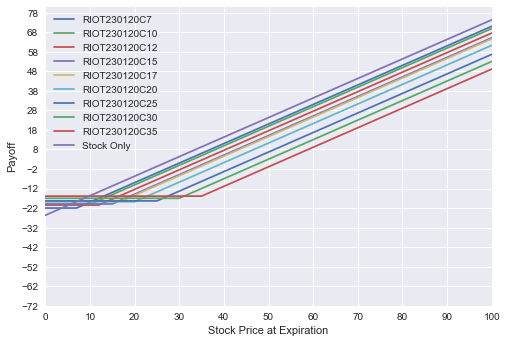

In [23]:
# Riot Strategy

s1 = options.Call('RIOT', '2023-01-20', 'buy', 7, 22.10, 25.84, 0.97,    max_price=100)
s2 = options.Call('RIOT', '2023-01-20', 'buy', 10, 20.25, 25.84, 0.97,   max_price=100)
s3 = options.Call('RIOT', '2023-01-20', 'buy', 12, 20.55, 25.84, 0.97,   max_price=100)
s4 = options.Call('RIOT', '2023-01-20', 'buy', 15, 20, 25.84, 0.97,      max_price=100)
s5 = options.Call('RIOT', '2023-01-20', 'buy', 17, 18.55, 25.84, 0.97,   max_price=100)
s6 = options.Call('RIOT', '2023-01-20', 'buy', 20, 18.85, 25.84, 0.97,   max_price=100)
s7 = options.Call('RIOT', '2023-01-20', 'buy', 25, 18.45, 25.84, 0.97,   max_price=100)
s8 = options.Call('RIOT', '2023-01-20', 'buy', 30, 17.10, 25.84, 0.97,   max_price=100)
s9 = options.Call('RIOT', '2023-01-20', 'buy', 35, 16, 25.84, 0.97,      max_price=100)


for strategy in [s1, s2, s3, s4, s5, s6, s7, s8, s9]:
    strategy.create_graph()

s1.create_graph_stock_only()

Strategy: ARKK230120C47.96 
Payoff Range:[ -100.8 , 151.2 ];Breakeven Price: 149 ;Cost: 100.8 ;Return Range:[ -100.0% , 150.0% ] ; Avg. Return: -2.8% ; Avg. Annual Return: -1.8% 

Strategy: ARKK230120C67.96 
Payoff Range:[ -85.3 , 146.7 ];Breakeven Price: 153 ;Cost: 85.3 ;Return Range:[ -100.0% , 172.0% ] ; Avg. Return: -6.4% ; Avg. Annual Return: -4.2% 

Strategy: ARKK230120C77.96 
Payoff Range:[ -77.9 , 144.1 ];Breakeven Price: 156 ;Cost: 77.9 ;Return Range:[ -100.0% , 185.0% ] ; Avg. Return: -8.4% ; Avg. Annual Return: -5.6% 

Strategy: ARKK230120C87.96 
Payoff Range:[ -71.1 , 140.9 ];Breakeven Price: 159 ;Cost: 71.1 ;Return Range:[ -100.0% , 198.2% ] ; Avg. Return: -11.3% ; Avg. Annual Return: -7.6% 

Strategy: ARKK230120C107.96 
Payoff Range:[ -60.1 , 131.9 ];Breakeven Price: 168 ;Cost: 60.1 ;Return Range:[ -100.0% , 219.5% ] ; Avg. Return: -20.0% ; Avg. Annual Return: -13.6% 

Strategy: ARKK230120C117.96 
Payoff Range:[ -56.4 , 125.6 ];Breakeven Price: 174 ;Cost: 56.4 ;Return Ran

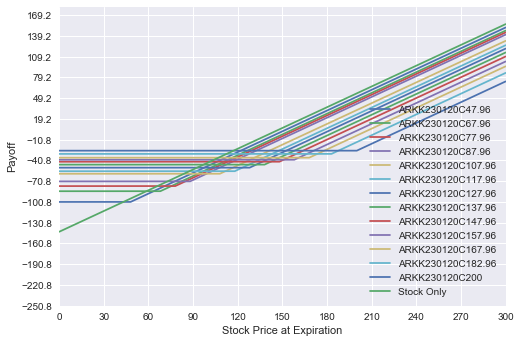

In [24]:
# ARK Calls

s1  = options.Call('ARKK', '2023-01-20', 'buy', 47.96, 100.80, 143.94, 0.39,   max_price=300)
s2  = options.Call('ARKK', '2023-01-20', 'buy', 67.96, 85.30, 143.94, 0.39,    max_price=300)
s3  = options.Call('ARKK', '2023-01-20', 'buy', 77.96, 77.90, 143.94, 0.39,    max_price=300)
s4  = options.Call('ARKK', '2023-01-20', 'buy', 87.96, 71.10, 143.94, 0.39,    max_price=300)
s5  = options.Call('ARKK', '2023-01-20', 'buy', 107.96, 60.10, 143.94, 0.39,   max_price=300)
s6  = options.Call('ARKK', '2023-01-20', 'buy', 117.96, 56.40, 143.94, 0.39,   max_price=300)
s7  = options.Call('ARKK', '2023-01-20', 'buy', 127.96, 51.30, 143.94, 0.39,   max_price=300)
s8  = options.Call('ARKK', '2023-01-20', 'buy', 137.96, 46.90, 143.94, 0.39,   max_price=300)
s9  = options.Call('ARKK', '2023-01-20', 'buy', 147.96, 42.70, 143.94, 0.39,   max_price=300)
s10 = options.Call('ARKK', '2023-01-20', 'buy', 157.96, 39.90, 143.94, 0.39,   max_price=300)
s11 = options.Call('ARKK', '2023-01-20', 'buy', 167.96, 36.90, 143.94, 0.39,   max_price=300)
s12 = options.Call('ARKK', '2023-01-20', 'buy', 182.96, 31.40, 143.94, 0.39,   max_price=300)
s13 = options.Call('ARKK', '2023-01-20', 'buy', 200, 26.70, 143.94, 0.39,      max_price=300)

for strategy in [s1, s2, s3, s4, s5, s6, s7, s8, s9, s10, s11, s12, s13]:
    strategy.create_graph()

s1.create_graph_stock_only()

Strategy: TSLA230129_BC830_BP800 
Payoff Range:[ -75.7 , 94.3 ];Breakeven Price: 24 ;Cost: 75.7 ;Return Range:[ -100.0% , 124.6% ] ; Avg. Return: -3.6% ; Avg. Annual Return: -2.3% 

Strategy: TSLA230129_BC850_BP850 
Payoff Range:[ -81.2 , 68.8 ];Breakeven Price: 69 ;Cost: 81.1 ;Return Range:[ -100.1% , 84.8% ] ; Avg. Return: -2.0% ; Avg. Annual Return: -1.3% 

Strategy: TSLA230129_BC870_BP870 
Payoff Range:[ -81.8 , 88.2 ];Breakeven Price: 88 ;Cost: 81.8 ;Return Range:[ -100.0% , 107.8% ] ; Avg. Return: -1.7% ; Avg. Annual Return: -1.1% 

Strategy: TSLA230129_BC875_BP875 
Payoff Range:[ -82.2 , 92.8 ];Breakeven Price: 93 ;Cost: 82.2 ;Return Range:[ -100.0% , 112.9% ] ; Avg. Return: -1.7% ; Avg. Annual Return: -1.1% 

Strategy: Stock Only 
Price Range:[ 0 , 3173 ];Payoff Range:[ -176.4 , 123.6 ];Breakeven Price: 876.4 Cost: 876.4 ;Return Range:[ -20.1% , 14.1% ]


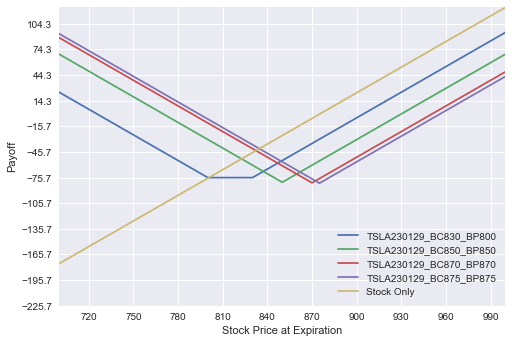

In [26]:
c1 = options.Call('TSLA', '2023-01-29', 'buy', 830, 65.75, 876.38, 0.45, min_price=700,  max_price=1000)
c2 = options.Call('TSLA', '2023-01-29', 'buy', 850, 54, 876.38, 0.45,    min_price=700,    max_price=1000)
c3 = options.Call('TSLA', '2023-01-29', 'buy', 870, 44.2, 876.38, 0.45,  min_price=700,  max_price=1000)
c4 = options.Call('TSLA', '2023-01-29', 'buy', 875, 41.8, 876.38, 0.45,  min_price=700,  max_price=1000)

p1 = options.Put('TSLA', '2023-01-29', 'buy', 800, 9.95, 876.38, 0.45,   min_price=700, max_price=1000)
p2 = options.Put('TSLA', '2023-01-29', 'buy', 850, 27.15, 876.38, 0.45,  min_price=700, max_price=1000)
p3 = options.Put('TSLA', '2023-01-29', 'buy', 870, 37.60, 876.38, 0.45,  min_price=700, max_price=1000)
p4 = options.Put('TSLA', '2023-01-29', 'buy', 875, 40.40, 876.38, 0.45,  min_price=700, max_price=1000)


s1 = options.OptionsStrategy([c1, p1])
s2 = options.OptionsStrategy([c2, p2])
s3 = options.OptionsStrategy([c3, p3])
s4 = options.OptionsStrategy([c4, p4])
s5 = options.OptionsStrategy([c4, p1])


for strategy in [s1, s2, s3, s4]:
    strategy.create_graph()
s1.create_graph_stock_only()

<h1> Google Sheet Helper </h1>

In [27]:
def read_google_sheet(google_sheet_name, tab_name):

    scope = ['https://spreadsheets.google.com/feeds',
             'https://www.googleapis.com/auth/drive']

    credentials = ServiceAccountCredentials.from_json_keyfile_name(
             '../../backup/google_api/stock-options-assessment-236c62880c44.json', scope) # Your json file here

    client = gspread.authorize(credentials)
    spreadsheetName = google_sheet_name
    sheetName = tab_name
    
    spreadsheet = client.open(spreadsheetName)
    sheet = spreadsheet.worksheet(sheetName)
    
    data = sheet.get_all_values()
    headers = data.pop(0)

    df = pd.DataFrame(data, columns=headers)
    display(df.head())
    
    return df

In [28]:
df = read_google_sheet("stock_options_data", "nio_210118")

,Symbol,Last,Bid,Ask,Change,% Change,Volume,Open Int,Imp Vol,Delta,...,Bid,Ask,Change,% Change,Volume,Open Int,Imp Vol,Delta,Theta,Vega
0,-NIO221216C1. Quote for -NIO221216C1.,63.4,54.2,57,0,0.00 %,0,166,--,1,...,0.06,0.16,0,0.00 %,0,"2,640",170.28 %,-0.0001,0,0.0004
1,-NIO221216C2. Quote for -NIO221216C2.,45.15,52,57,0,0.00 %,0,8,--,1,...,0.13,0.42,0,0.00 %,0,152,143.49 %,-0.0009,-0.0002,0.0023
2,-NIO221216C3. Quote for -NIO221216C3.,54.18,51,56,0,0.00 %,0,26,--,1,...,0.17,0.3,0,0.00 %,0,589,118.24 %,-0.0023,-0.0004,0.0056
3,-NIO221216C4. Quote for -NIO221216C4.,50.4,50.5,55.45,0,0.00 %,0,30,101.49 %,1,...,0.26,0.44,0,0.00 %,0,275,113.58 %,-0.0043,-0.0007,0.01
4,-NIO221216C5. Quote for -NIO221216C5.,60,49.5,54.5,0,0.00 %,0,341,93.77 %,1,...,0.45,0.8,0,0.00 %,0,"4,913",116.98 %,-0.0069,-0.001,0.0152


In [29]:
std = 61.95*0.9531*np.sqrt(5/12)

<H1> Monte Carlo Price Prediction </H1>

In [30]:
def predict_price(curr_price, imp_vol, exp_date):

    exp_date = datetime.strptime(exp_date, '%Y-%m-%d')
    curr_date = datetime.now()
    month_from_now = (exp_date.year - curr_date.year)*12 + (exp_date.month - curr_date.month) 



    std_dev = curr_price * imp_vol * np.sqrt(month_from_now/12)

    num_reps = 1000
    num_iter = 1000
    possible_prices = []

    # Generate all possible prices
    for i in range(num_iter):
        prices = np.random.normal(curr_price, std_dev, num_reps)
        prices = [int(x) if x>=0 else x for x in prices ]
        possible_prices.extend(prices)

    # count all the prices and create a dictionary
    price_counter = {}
    for price in possible_prices:
        if price_counter.get(price):
            price_counter[price]+=1
        else:
            price_counter[price] = 1 

    # Create a list of counts and a list of probabilities
    max_price = 200
    total_count = len(possible_prices)

    price_count = []
    price_prob = [] 


    for price in range(max_price):
        if price_counter.get(price):
            price_count.append(price_counter[price])

            prob = price_counter[price]/total_count
            price_prob.append(prob)
        else:
            price_count.append(0)
            price_prob.append(0)


    plt.bar(range(max_price), price_count)

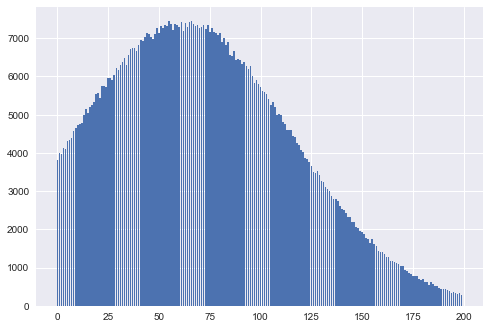

In [31]:
curr_price = 61.95
imp_vol = 0.9531
exp_date = '2022-05-18'

predict_price(curr_price, imp_vol, exp_date)